<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_pedido         1000 non-null   int64         
 1   data_pedido       1000 non-null   datetime64[ns]
 2   cliente_id        1000 non-null   int64         
 3   categoria         1000 non-null   object        
 4   canal_venda       1000 non-null   object        
 5   cidade            1000 non-null   object        
 6   quantidade        1000 non-null   int64         
 7   valor_unitario    1000 non-null   float64       
 8   desconto          1000 non-null   float64       
 9   frete             965 non-null    float64       
 10  status_pagamento  1000 non-null   object        
 11  receita_bruta     1000 non-null   float64       
 12  valor_desconto    1000 non-null   float64       
 13  receita_liquida   1000 non-null   float64       
dtypes: datetime64[ns](1), flo

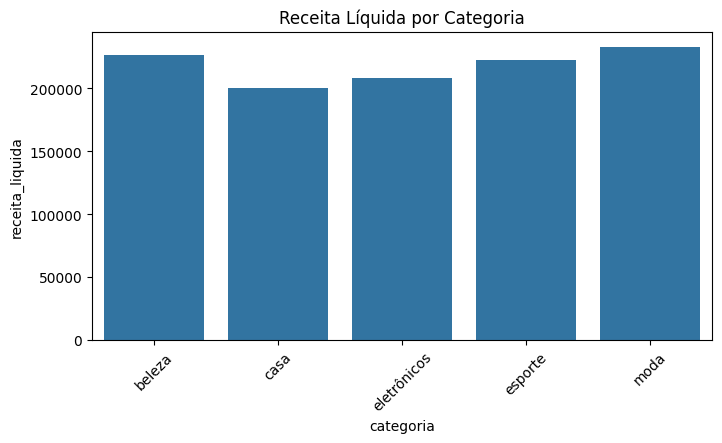

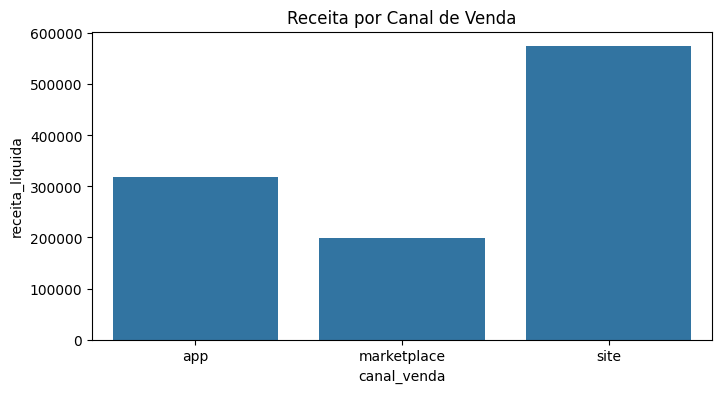

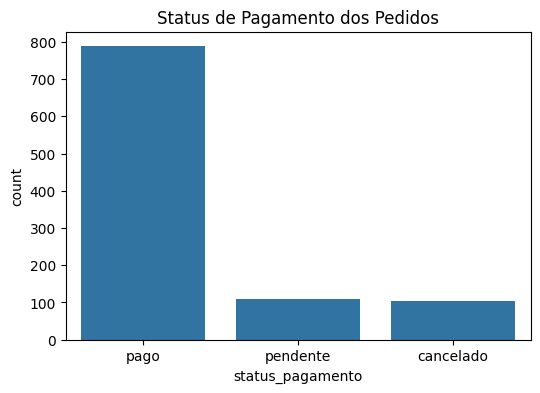

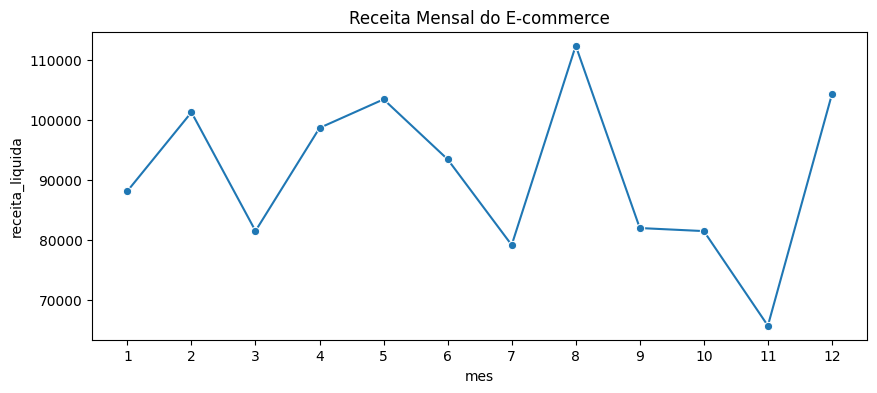

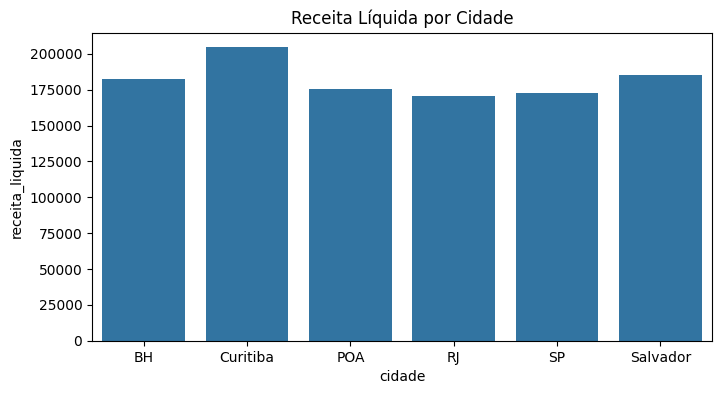

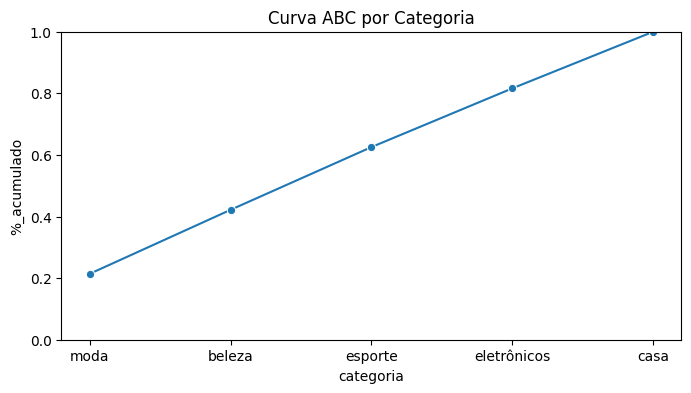

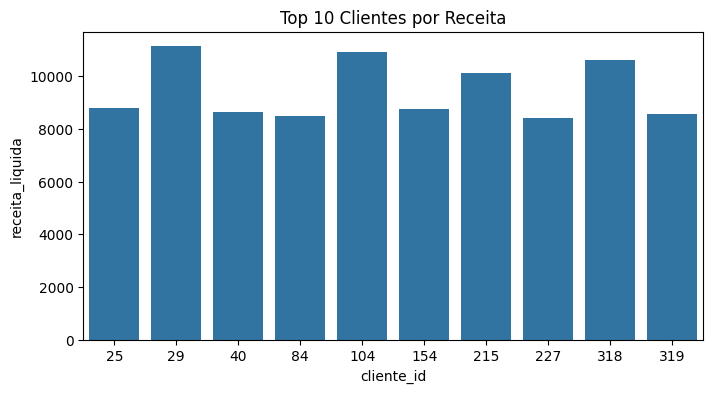

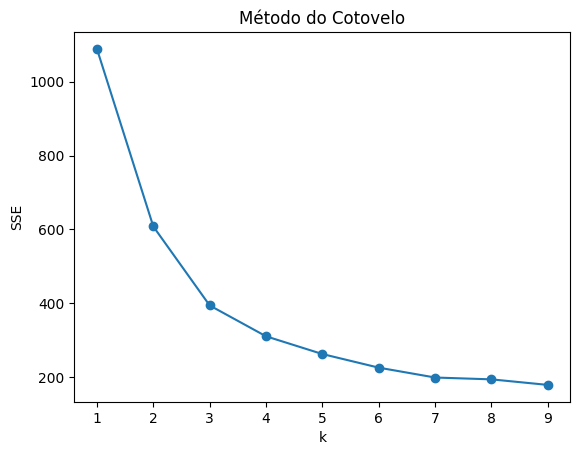

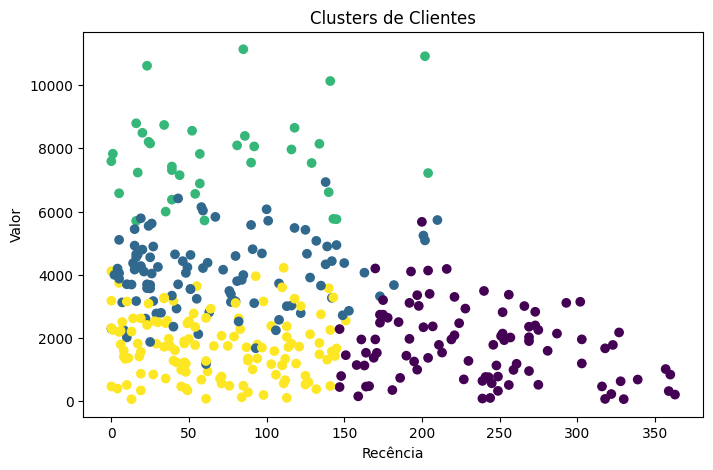

Prévia da tabela RFM:
   cliente_id  recencia  frequencia      valor R_score F_score M_score  \
0           1       302           2  3145.9366       1       2       4   
1           2        37           2  1977.0936       4       2       2   
2           3        19           3  4276.8912       5       3       4   
3           4         0           4  2295.8410       5       4       3   
4           5       142           3  3270.6331       2       3       4   

  RFM_score    segmento  
0       124  Alto Valor  
1       422       Leais  
2       534       Leais  
3       543       Leais  
4       234  Alto Valor  


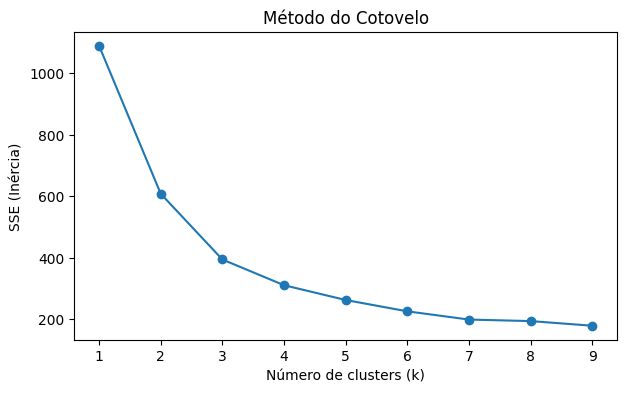


Distribuição de clientes por cluster:
cluster
3    127
1    105
0     95
2     36
Name: count, dtype: int64


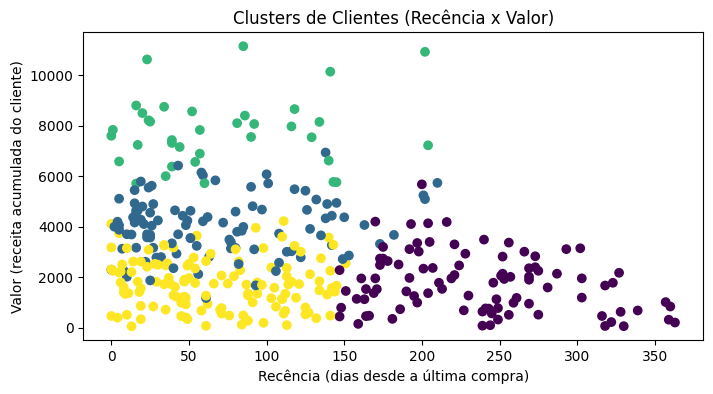


Perfil médio de cada cluster:
         recencia  frequencia    valor
cluster                               
0          235.43        1.65  1768.81
1           68.24        3.81  4002.27
2           71.19        5.47  7770.06
3           67.57        1.94  1753.19

Cruzamento Segmento RFM x Cluster:
segmento  Alto Valor  Atenção  Em risco  Frequentes  Leais  Potenciais  \
cluster                                                                  
0                 10       21        55           9      0           0   
1                  7        1         0          38     24           0   
2                  0        0         0          15      0           0   
3                  7       17         0           5     65          33   

segmento  TOP (Campeões)  
cluster                   
0                      0  
1                     35  
2                     21  
3                      0  
Analisando outliers da variável: receita_liquida
count    1000.000000
mean     1090.653124
s

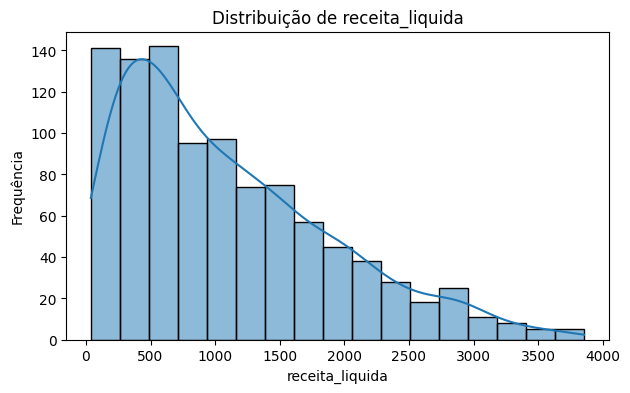

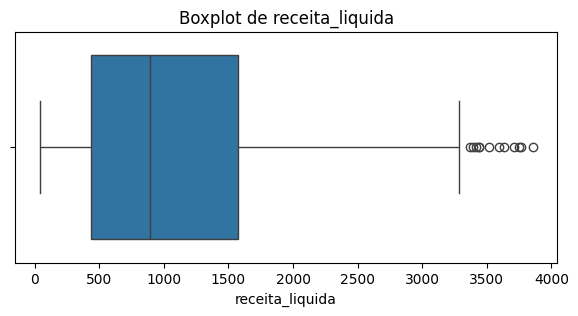


--- OUTLIERS PELO MÉTODO IQR ---
Total de outliers: 12
     receita_liquida
82         3512.9080
145        3413.5310
146        3711.7765
355        3763.0100
388        3435.2360

--- OUTLIERS PELO MÉTODO Z-SCORE ---
Total de outliers: 6
     receita_liquida    zscore
146        3711.7765  3.224848
355        3763.0100  3.287882
538        3634.8815  3.130242
569        3854.5500  3.400507
922        3597.0500  3.083697

Comparação de quantidades:
IQR: 12 outliers
Z-score: 6 outliers

--- INTERPRETAÇÃO AUTOMÁTICA ---
Existem valores acima do esperado, podem representar picos de venda ou produtos de ticket alto.

📌 Missing values antes do tratamento:
 id_pedido            0
data_pedido          0
cliente_id           0
categoria            0
canal_venda          0
cidade               0
quantidade           0
valor_unitario       0
desconto             0
frete               35
status_pagamento     0
receita_bruta        0
valor_desconto       0
receita_liquida      0
mes             

,id_pedido,data_pedido,cliente_id,categoria,canal_venda,cidade,quantidade,valor_unitario,desconto,frete,...,receita_liquida,mes,ticket_medio,ano,dia_semana,is_outlier_receita,categoria_cod,canal_cod,cidade_cod,status_pagamento_cod
0,1,2023-01-01,259,beleza,marketplace,BH,5,69.67,0.22,27.47,...,299.1830,1,59.836600,2023,Sunday,False,0,1,0,1
1,2,2023-01-01,161,beleza,marketplace,Salvador,3,158.16,0.26,46.49,...,397.6052,1,132.535067,2023,Sunday,False,0,1,5,2
2,3,2023-01-01,390,beleza,app,RJ,5,24.01,0.06,47.39,...,160.2370,1,32.047400,2023,Sunday,False,0,0,3,2
3,4,2023-01-01,178,beleza,app,SP,5,367.42,0.12,3.47,...,1620.1180,1,324.023600,2023,Sunday,False,0,0,4,2
4,5,2023-01-01,10,moda,site,SP,3,85.72,0.28,22.82,...,207.9752,1,69.325067,2023,Sunday,False,4,2,4,0



📌 Missing values pós-tratamento:
 id_pedido               0
data_pedido             0
cliente_id              0
categoria               0
canal_venda             0
cidade                  0
quantidade              0
valor_unitario          0
desconto                0
frete                   0
status_pagamento        0
receita_bruta           0
valor_desconto          0
receita_liquida         0
mes                     0
ticket_medio            0
ano                     0
dia_semana              0
is_outlier_receita      0
categoria_cod           0
canal_cod               0
cidade_cod              0
status_pagamento_cod    0
dtype: int64

📌 Quantidade de outliers sinalizados: 12

💾 Arquivo salvo como df_vendas_tratado.csv


In [20]:
import pandas as pd
import numpy as np

# deixar resultados reproduzíveis
np.random.seed(42)

# quantidade de pedidos
n = 1000

datas = (
    pd.date_range("2023-01-01", periods=365)
    .to_series()
    .sample(n, replace=True)
    .sort_values()
    .values
)

categorias = ["eletrônicos", "moda", "casa", "beleza", "esporte"]
canais = ["site", "app", "marketplace"]
status_pag = ["pago", "pendente", "cancelado"]
cidades = ["SP", "RJ", "BH", "POA", "Curitiba", "Salvador"]

df_vendas = pd.DataFrame({
    "id_pedido": range(1, n + 1),
    "data_pedido": datas,
    "cliente_id": np.random.randint(1, 401, size=n),
    "categoria": np.random.choice(categorias, size=n),
    "canal_venda": np.random.choice(canais, size=n, p=[0.5, 0.3, 0.2]),
    "cidade": np.random.choice(cidades, size=n),
    "quantidade": np.random.randint(1, 6, size=n),
    "valor_unitario": np.round(np.random.uniform(20, 800, size=n), 2),
    "desconto": np.round(np.random.uniform(0, 0.3, size=n), 2),
    "frete": np.round(np.random.uniform(0, 50, size=n), 2),
    "status_pagamento": np.random.choice(status_pag, size=n, p=[0.8, 0.1, 0.1])
})

# métricas de valor
df_vendas["receita_bruta"] = df_vendas["quantidade"] * df_vendas["valor_unitario"]
df_vendas["valor_desconto"] = df_vendas["receita_bruta"] * df_vendas["desconto"]
df_vendas["receita_liquida"] = df_vendas["receita_bruta"] - df_vendas["valor_desconto"] + df_vendas["frete"]

# criar alguns valores ausentes em frete (pra gente aprender a tratar depois)
mask_frete_nulo = np.random.rand(n) < 0.03  # 3% das linhas
df_vendas.loc[mask_frete_nulo, "frete"] = np.nan


df_vendas.head()        # ver as primeiras linhas
df_vendas.info()        # tipos de dados e nulos
df_vendas.describe()    # estatísticas numéricas

# tamanho do dataset
print("Linhas:", df_vendas.shape[0])
print("Colunas:", df_vendas.shape[1])

# receita total
print("Receita líquida total:", df_vendas["receita_liquida"].sum())

print("TICKET MÉDIO: ", df_vendas["receita_liquida"].mean())
print("TOTAL DE PEDIDOS:", df_vendas["id_pedido"].nunique())
print("TOTAL DE CLIENTES:", df_vendas["cliente_id"].nunique())
print("RECEITA POR CATEGORIA:")
print(df_vendas.groupby("categoria")["receita_liquida"].sum())
print("\nRECEITA POR CANAL DE VENDA:")
print(df_vendas.groupby("canal_venda")["receita_liquida"].sum())
print("\nVENDAS POR STATUS DE PAGAMENTO:")
print(df_vendas["status_pagamento"].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,4))
sns.barplot(data=df_vendas.groupby("categoria")["receita_liquida"].sum().reset_index(),
            x="categoria", y="receita_liquida")
plt.title("Receita Líquida por Categoria")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=df_vendas.groupby("canal_venda")["receita_liquida"].sum().reset_index(),
            x="canal_venda", y="receita_liquida")
plt.title("Receita por Canal de Venda")
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(data=df_vendas, x="status_pagamento")
plt.title("Status de Pagamento dos Pedidos")
plt.show()

df_vendas["mes"] = df_vendas["data_pedido"].dt.month

receita_mensal = df_vendas.groupby("mes")["receita_liquida"].sum().reset_index()
receita_mensal

plt.figure(figsize=(10,4))
sns.lineplot(data=receita_mensal, x="mes", y="receita_liquida", marker="o")
plt.title("Receita Mensal do E-commerce")
plt.xticks(range(1,13))
plt.show()

receita_por_cidade = df_vendas.groupby("cidade")["receita_liquida"].sum().reset_index()
receita_por_cidade

plt.figure(figsize=(8,4))
sns.barplot(data=receita_por_cidade, x="cidade", y="receita_liquida")
plt.title("Receita Líquida por Cidade")
plt.show()


abc = (
    df_vendas.groupby("categoria")["receita_liquida"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

abc["%_acumulado"] = (abc["receita_liquida"] / abc["receita_liquida"].sum()).cumsum()
abc

plt.figure(figsize=(8,4))
sns.lineplot(data=abc, x="categoria", y="%_acumulado", marker="o")
plt.title("Curva ABC por Categoria")
plt.ylim(0,1)
plt.show()

top_clientes = (
    df_vendas.groupby("cliente_id")["receita_liquida"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_clientes.head(10)

plt.figure(figsize=(8,4))
sns.barplot(data=top_clientes.head(10), x="cliente_id", y="receita_liquida")
plt.title("Top 10 Clientes por Receita")
plt.show()

top10_percentual = top_clientes.head(10)["receita_liquida"].sum() / df_vendas["receita_liquida"].sum()
top10_percentual

import pandas as pd

# Cópia da base
df_rfm = df_vendas.copy()

# Recência precisa da última data disponível no dataset
data_max = df_rfm["data_pedido"].max()
data_max

df_rfm_calc = df_rfm.groupby("cliente_id").agg({
    "data_pedido": lambda x: (data_max - x.max()).days,   # Recência
    "id_pedido": "count",                                 # Frequência
    "receita_liquida": "sum"                              # Valor monetário
}).reset_index()

df_rfm_calc.columns = ["cliente_id", "recencia", "frequencia", "valor"]
df_rfm_calc.head()

df_rfm_calc["R_score"] = pd.qcut(df_rfm_calc["recencia"], 5, labels=[5,4,3,2,1])
df_rfm_calc["F_score"] = pd.qcut(df_rfm_calc["frequencia"].rank(method="first"), 5, labels=[1,2,3,4,5])
df_rfm_calc["M_score"] = pd.qcut(df_rfm_calc["valor"], 5, labels=[1,2,3,4,5])

df_rfm_calc["RFM_score"] = (
    df_rfm_calc["R_score"].astype(str) +
    df_rfm_calc["F_score"].astype(str) +
    df_rfm_calc["M_score"].astype(str)
)

df_rfm_calc.head()


def segmentar(rfm):
    if rfm in ["555", "554", "545", "544"]:
        return "TOP (Campeões)"
    elif rfm.startswith("5"):
        return "Leais"
    elif rfm.startswith("4"):
        return "Bons Clientes"
    elif rfm.startswith("3"):
        return "Potenciais"
    elif rfm.startswith("2"):
        return "Atenção"
    else:
        return "Em risco"

df_rfm_calc["segmento"] = df_rfm_calc["RFM_score"].apply(segmentar)
df_rfm_calc.head()

from sklearn.preprocessing import StandardScaler

X = df_rfm_calc[["recencia", "frequencia", "valor"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(range(1, 10), sse, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("k")
plt.ylabel("SSE")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
df_rfm_calc["cluster"] = kmeans.fit_predict(X_scaled)

df_rfm_calc.head()

plt.figure(figsize=(8,5))
plt.scatter(df_rfm_calc["recencia"], df_rfm_calc["valor"], c=df_rfm_calc["cluster"])
plt.xlabel("Recência")
plt.ylabel("Valor")
plt.title("Clusters de Clientes")
plt.show()

# ==========================================
# RFM + CLUSTERIZAÇÃO DE CLIENTES (K-MEANS)
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Base RFM a partir de df_vendas
df_rfm = df_vendas.copy()

# Data de referência para recência (última data de pedido)
data_ref = df_rfm["data_pedido"].max()

# 2. Cálculo de Recência, Frequência e Valor por cliente
df_rfm_calc = (
    df_rfm
    .groupby("cliente_id")
    .agg({
        "data_pedido": lambda x: (data_ref - x.max()).days,  # recência: dias desde a última compra
        "id_pedido": "count",                                # frequência: nº de pedidos
        "receita_liquida": "sum"                             # valor: quanto esse cliente já gastou
    })
    .reset_index()
)

df_rfm_calc.columns = ["cliente_id", "recencia", "frequencia", "valor"]

# 3. Criação dos scores R, F, M (de 1 a 5)
# Quanto MENOR a recência, MAIOR a nota → por isso rótulos invertidos
df_rfm_calc["R_score"] = pd.qcut(df_rfm_calc["recencia"], 5, labels=[5,4,3,2,1])

# Frequência e Valor: quanto MAIOR, MAIOR a nota
df_rfm_calc["F_score"] = pd.qcut(
    df_rfm_calc["frequencia"].rank(method="first"),
    5, labels=[1,2,3,4,5]
)
df_rfm_calc["M_score"] = pd.qcut(
    df_rfm_calc["valor"],
    5, labels=[1,2,3,4,5]
)

# Score RFM concatenado
df_rfm_calc["RFM_score"] = (
    df_rfm_calc["R_score"].astype(str) +
    df_rfm_calc["F_score"].astype(str) +
    df_rfm_calc["M_score"].astype(str)
)

# 4. Segmentação textual a partir do score RFM
def segmentar(rfm):
    if rfm in ["555", "554", "545", "544", "455", "454", "445", "444"]:
        return "TOP (Campeões)"
    elif rfm[0] in ["4", "5"]:
        return "Leais"
    elif rfm[1] in ["4", "5"]:
        return "Frequentes"
    elif rfm[2] in ["4", "5"]:
        return "Alto Valor"
    elif rfm[0] == "3":
        return "Potenciais"
    elif rfm[0] == "2":
        return "Atenção"
    else:
        return "Em risco"

df_rfm_calc["segmento"] = df_rfm_calc["RFM_score"].apply(segmentar)

print("Prévia da tabela RFM:")
print(df_rfm_calc.head())

# -----------------------------
# 5. CLUSTERIZAÇÃO (K-MEANS)
# -----------------------------

# Features numéricas para cluster
X = df_rfm_calc[["recencia", "frequencia", "valor"]]

# Padronização (média 0, desvio 1) – importantíssimo pro K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5.1 Método do cotovelo para escolher k
sse = []
ks = range(1, 10)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(ks, sse, marker="o")
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("SSE (Inércia)")
plt.show()

# Escolha do k (visualmente o "joelho" costuma ser 3 ou 4)
k_escolhido = 4  # se quiser testar 3 depois, é só trocar aqui

kmeans = KMeans(n_clusters=k_escolhido, random_state=42)
df_rfm_calc["cluster"] = kmeans.fit_predict(X_scaled)

print("\nDistribuição de clientes por cluster:")
print(df_rfm_calc["cluster"].value_counts())

# 5.2 Visualização simples dos clusters (Recência x Valor)
plt.figure(figsize=(8,4))
plt.scatter(
    df_rfm_calc["recencia"],
    df_rfm_calc["valor"],
    c=df_rfm_calc["cluster"]
)
plt.xlabel("Recência (dias desde a última compra)")
plt.ylabel("Valor (receita acumulada do cliente)")
plt.title("Clusters de Clientes (Recência x Valor)")
plt.show()

# 5.3 Perfil médio de cada cluster
cluster_profile = (
    df_rfm_calc
    .groupby("cluster")[["recencia", "frequencia", "valor"]]
    .mean()
    .round(2)
)

print("\nPerfil médio de cada cluster:")
print(cluster_profile)

# 5.4 Cruzar cluster com segmento RFM
print("\nCruzamento Segmento RFM x Cluster:")
print(pd.crosstab(df_rfm_calc["cluster"], df_rfm_calc["segmento"]))



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# ==============================
# 1. Selecionar variável de interesse (receita líquida)
# ==============================

variavel = "receita_liquida"

print(f"Analisando outliers da variável: {variavel}")
print(df_vendas[variavel].describe())

# ==============================
# 2. Histograma + KDE
# ==============================

plt.figure(figsize=(7,4))
sns.histplot(df_vendas[variavel], kde=True)
plt.title(f"Distribuição de {variavel}")
plt.xlabel(variavel)
plt.ylabel("Frequência")
plt.show()

# ==============================
# 3. Boxplot
# ==============================

plt.figure(figsize=(7,3))
sns.boxplot(x=df_vendas[variavel])
plt.title(f"Boxplot de {variavel}")
plt.show()

# ==============================
# 4. Método IQR (Interquartile Range)
# ==============================

Q1 = df_vendas[variavel].quantile(0.25)
Q3 = df_vendas[variavel].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_iqr = df_vendas[
    (df_vendas[variavel] < limite_inferior) |
    (df_vendas[variavel] > limite_superior)
]

print("\n--- OUTLIERS PELO MÉTODO IQR ---")
print(f"Total de outliers: {len(outliers_iqr)}")
print(outliers_iqr[[variavel]].head())

# ==============================
# 5. Método Z-SCORE
# ==============================

df_vendas["zscore"] = stats.zscore(df_vendas[variavel])

outliers_z = df_vendas[df_vendas["zscore"].abs() > 3]

print("\n--- OUTLIERS PELO MÉTODO Z-SCORE ---")
print(f"Total de outliers: {len(outliers_z)}")
print(outliers_z[[variavel, "zscore"]].head())

# ==============================
# 6. Comparação final
# ==============================

print("\nComparação de quantidades:")
print(f"IQR: {len(outliers_iqr)} outliers")
print(f"Z-score: {len(outliers_z)} outliers")

# ==============================
# 7. Interpretação automática (EXTRA)
# ==============================

media = df_vendas[variavel].mean()
maximo = df_vendas[variavel].max()

print("\n--- INTERPRETAÇÃO AUTOMÁTICA ---")
if maximo > media * 5:
    print("⚠️ Existem vendas MUITO acima da média — provável cluster de clientes premium.")
elif len(outliers_iqr) == 0:
    print("Nenhum outlier relevante — distribuição limpa.")
else:
    print("Existem valores acima do esperado, podem representar picos de venda ou produtos de ticket alto.")

# Remover zscore temporário
df_vendas.drop(columns=["zscore"], inplace=True)


# ============================================================
# AULA 2 — PRÉ-PROCESSAMENTO COMPLETO DO df_vendas
# ============================================================

import pandas as pd
import numpy as np

# 1. Cópia de trabalho
df = df_vendas.copy()

# -------------------------------
# 2. Corrigir tipos e datas
# -------------------------------
df['data_pedido'] = pd.to_datetime(df['data_pedido'], errors='coerce')

# -------------------------------
# 3. Verificar missing values
# -------------------------------
print("\n📌 Missing values antes do tratamento:\n", df.isna().sum())

# Preencher frete ausente com mediana
df['frete'] = df['frete'].fillna(df['frete'].median())

# -------------------------------
# 4. Criar novas features
# -------------------------------

# Ticket médio do pedido
df['ticket_medio'] = df['receita_liquida'] / df['quantidade']

# Mês da compra
df['mes'] = df['data_pedido'].dt.month

# Ano da compra
df['ano'] = df['data_pedido'].dt.year

# Dia da semana
df['dia_semana'] = df['data_pedido'].dt.day_name()

# -------------------------------
# 5. Tratamento de outliers (sem remover — apenas sinalizar)
# -------------------------------

Q1 = df['receita_liquida'].quantile(0.25)
Q3 = df['receita_liquida'].quantile(0.75)
IQR = Q3 - Q1
limite_sup = Q3 + 1.5 * IQR

df['is_outlier_receita'] = df['receita_liquida'] > limite_sup

# -------------------------------
# 6. Encoding automático para textos
# (não substitui original — cria versão numérica para modelagem)
# -------------------------------
df['categoria_cod'] = df['categoria'].astype('category').cat.codes
df['canal_cod'] = df['canal_venda'].astype('category').cat.codes
df['cidade_cod'] = df['cidade'].astype('category').cat.codes
df['status_pagamento_cod'] = df['status_pagamento'].astype('category').cat.codes

# -------------------------------
# 7. Estatísticas finais
# -------------------------------
print("\n✔ Dados tratados. Preview:")
display(df.head())

print("\n📌 Missing values pós-tratamento:\n", df.isna().sum())
print("\n📌 Quantidade de outliers sinalizados:", df['is_outlier_receita'].sum())

# -------------------------------
# 8. Exportar dataset tratado
# -------------------------------
df.to_csv("df_vendas_tratado.csv", index=False)
print("\n💾 Arquivo salvo como df_vendas_tratado.csv")


